In [34]:
import simulation

simulation.main()

final reward: 29.029


### Stratégie d’exploration/exploitation Epsilon-Greedy :

La policy met en œuvre une stratégie ε-gourmande, qui est une méthode courante pour équilibrer l'exploration et l'exploitation dans l'apprentissage par renforcement. Epsilon (ε) détermine la probabilité d'exploration. Si un nombre aléatoire tiré d’une distribution uniforme entre 0 et 1 est inférieur à epsilon, l’agent choisit une action aléatoire. Sinon, il exploite les connaissances actuelles pour choisir l’action dont la récompense estimée est la plus élevée. Dans cette implémentation, epsilon est initialement défini sur 1, indiquant que l'agent doit donner la priorité à l'exploration plutôt qu'à l'exploitation au début.

### Valeur Epsilon adaptative :

La valeur epsilon est adaptée en fonction de la récompense la plus connue observée par l'agent.
Si la récompense la plus connue n'est pas nulle, cela signifie que l'agent a rencontré une récompense non nulle et réduit donc l'epsilon. La raison derrière cela est de réduire l’exploration à mesure que l’agent commence à apprendre de meilleures actions avec des récompenses non nulles.
La formule utilisée pour adapter epsilon est : epsilon = (100 - best_reward) / 100. Cette formule met epsilon à l'échelle inversement avec la récompense la plus connue, de sorte que des récompenses plus élevées conduisent à des probabilités d'exploration plus faibles.

### Choisir la meilleure action :

La fonction get_best_action détermine la meilleure action à entreprendre en fonction des connaissances actuelles de l'agent en matière de récompenses. Il compare la position de la récompense connue la plus élevée avec la position actuelle de l'agent et choisit l'action appropriée (gauche, droite ou aucune) pour se rapprocher de la position avec la récompense connue la plus élevée.

### choix de la Valeur de départ d'epsilon

Pour déterminer si une valeur initiale de 1 pour epsilon est la meilleure option, nous testons empiriquement les valeurs de 0 à 1 et observons quelle valeur produit les meilleurs résultats:

In [35]:
import numpy as np
from agent import Agent

def yann_simon_policy(agent: Agent, epsilon: float) -> str:
    actions = ["left", "right", "none"]
    best_reward = agent.known_rewards[np.argmax(agent.known_rewards)]

    if best_reward != 0:
        epsilon = (100 - best_reward) / 100

    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(actions)
    else:
        action = get_best_action(agent)
    return action

def get_best_action(agent: Agent):
    best_reward_pos = np.argmax(agent.known_rewards)

    if best_reward_pos == agent.position:
        return "none"
    elif best_reward_pos > agent.position:
        return "right"
    else:
        return "left"

>la seule différence avec yann_simon_policy.py c'est que j'aie mis epsilon dans les paramètres de yann_simon_policy pour pouvoir plot et trouver celui avec le meilleur average

In [36]:
import numpy as np

from agent import Agent

WORLD_SIZE = 8
WORLD_UPDATE_PERIOD = 10
NB_PERIODS = int(2e3)
TOTAL_NUMBER_OF_STEPS = NB_PERIODS * WORLD_UPDATE_PERIOD
MAX_REWARD = 100
NB_REWARDS = 3

def reset_rewards(world_size: int) -> np.ndarray:
    rewards = np.zeros(world_size)
    for _ in range(NB_REWARDS):
        reward = np.random.randint(MAX_REWARD)
        position = np.random.randint(world_size)
        rewards[position] = reward
    return rewards

def run_simulation(epsilon: float) -> list:
    rewards = reset_rewards(WORLD_SIZE)

    # initially, the agent does not know
    # the rewards distribution and the rewards
    # that are known to the agent are set to 0
    known_rewards = np.zeros(WORLD_SIZE)
    initial_position = int(WORLD_SIZE / 2)
    agent = Agent(initial_position, known_rewards)

    accumulated_reward = 0
    averaged_rewards = list()

    for step in range(TOTAL_NUMBER_OF_STEPS):

        # update world periodically
        # when the world is updated, the agent knows nothing
        # about the rewards anymore
        if step % (WORLD_UPDATE_PERIOD) == 0:
            rewards = reset_rewards(WORLD_SIZE)
            agent.known_rewards = np.zeros(WORLD_SIZE)
            # print("\n---\nreset the rewards\n---")
            # print(f"rewards: {rewards}\n")

        # choose action and move agent
        action = yann_simon_policy(agent, epsilon)
        agent.move(action, WORLD_SIZE)
        # print(f"move {action}")
        # print(f"position: {agent.position}")

        # get reward
        reward = rewards[agent.position]
        agent.known_rewards[agent.position] = reward
        # print(f"found reward {reward}")
        # print(f"known rewards: {agent.known_rewards}\n")

        # update and average the obtained rewards
        accumulated_reward += reward
        averaged_reward = accumulated_reward / (step + 1)
        averaged_rewards.append(averaged_reward)
    return averaged_rewards

>comme pour yann_simon_policy la seule différence avec simulation py c'est que j'aie mis epsilon dans les paramètres de run_simulation pour pouvoir plot et trouver celui avec le meilleur average et j'ai enlevé la sauvegarde dans images

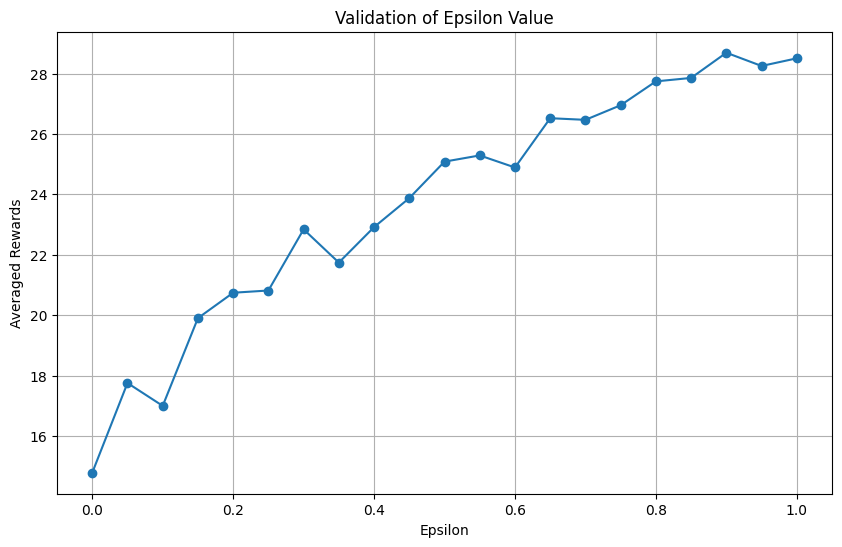

In [37]:
import matplotlib.pyplot as plt

validation_epsilon = list()
for epsilon in range(0, 105, 5):
    validation_epsilon.append((epsilon / 100, run_simulation(epsilon / 100)[-1]))

epsilons, averaged_rewards_over_epsilon = zip(*validation_epsilon)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epsilons, averaged_rewards_over_epsilon, marker='o', linestyle='-')
plt.title('Validation of Epsilon Value')
plt.xlabel('Epsilon')
plt.ylabel('Averaged Rewards')
plt.grid(True)
plt.show()

Ainsi, nous pouvons confirmer que l'utilisation d'une valeur initiale de 1 pour epsilon donne les meilleurs résultats.


### conclusion

Cette méthode ajuste dynamiquement le compromis exploration-exploitation en fonction de l'expérience de l'agent, dans le but d'établir un équilibre entre l'exploration de nouvelles actions et l'exploitation d'actions connues avec des récompenses plus élevées. Cette stratégie adaptative permet à l'agent d'apprendre et de s'adapter efficacement à l'environnement, conduisant potentiellement à une amélioration des performances au fil du temps.